# **Lab session 1**

This is the work of Eidan Tzdaka and Alexandre Amiot

## **Exercise 2 : Recognition of hand-written characters from the scikit-learn database using a perceptron**

In this exercise you are to implement a simple hand-written digit classifier based on a perceptron (no convolutional networks). 

**This assignment contains examples of results you should reproduce with your code.**

Import the **MNIST** dataset of the digits from scikit-learn

from sklearn import datasets

digits = datasets.load_digits()

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Import the dataset of the digits from scikit-learn

from sklearn import datasets
digits = datasets.load_digits()


The data we are interested in are 8x8 images of digits. They are stored in the `images` attribute of the dataset. 

Have a look at the data and the classes: 

1.   For every image, we know which digit it represents. It is the  'target' of the dataset.
2.   Show the first 10 images and their target.



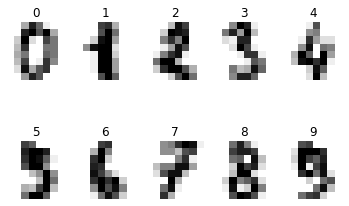

In [2]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
  plt.subplot(2, 5, index + 1)
  plt.axis('off')
  plt.imshow(image, cmap=plt.cm.gray_r)
  plt.title('%i' % label)

To apply a perceptron classifier on this data, we will not use 8x8 images but the vectorized version stored in digits.data.

1. How many images do we have in the dataset?
2. How many classes do we have in the dataset?
3. What is the size of the vector representing the flattened version of the images?

1, The digit dataset is made of 1797 8x8 images

2, We have 10 classes in this dataset

3, The size of the vector representing the flattened version of the image is 10.

In [3]:
 print (digits.data.shape)


(1797, 64)


How many classes do we have? 

In [4]:
n_classes = len(np.unique(digits.target))
print ("We have a total of %d classes."%n_classes)

We have a total of 10 classes.


Convert the target into the matrix 'y' in one-hot format.
This will allow the predictors output one at a time using the soft-max activation. What is the shape of the 'y' matrix. Use the keras function **utils.to_categorical()**.

In [5]:
from tensorflow import keras
y = keras.utils.to_categorical(digits.target, n_classes)
print (y.shape)

(1797, 10)


## Prepare the train and test dataset.

1.   split dataset into test and train dataset.
2.   split further the train dataset into train and validation part
Use the **keras.model_selection** function **train_test_split()** to separate a dataset. You can choose the percentage of the split, or leave the defaut value.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

## create the sequential model

1.   The model will the keras sequential model containing the one-layer perceptron. 
Instantiate the model using **model=Sequential()**, then add a **Dense()** layer from **keras.layers**. Adding layers can be done using the model's class function **model.add()**.
Specify the input shape, and the number of classes to output. What kind of activation will you use?

We will use the softmax activation because the classification is for non binary data, we have more than 2 classes.

2.   Compile the model. Specify the loss. Choose an optimizer and the evaluation metrics to use. Use the class function **compile()** of the sequential model you have created.



In [20]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(n_classes, input_shape=digits.data[0].shape,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])


## train the model

You need to specify the size of the batch and the number of epochs to train. You need to provide the training and the validation data.

Use the sequential model's class function **fit()** to train the model.

In [21]:
history = model.fit(X_train, y_train, batch_size=128, epochs=100, verbose=1,validation_data=(X_val,y_val))


Epoch 1/100
8/8 [==============================] - 0s 24ms/step - loss: 11.7768 - accuracy: 0.0545 - val_loss: 10.9982 - val_accuracy: 0.0623
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 9.9951 - accuracy: 0.0820 - val_loss: 8.9683 - val_accuracy: 0.0801
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 7.8336 - accuracy: 0.1282 - val_loss: 7.4401 - val_accuracy: 0.1276
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 6.8988 - accuracy: 0.1558 - val_loss: 6.3607 - val_accuracy: 0.1751
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 5.8279 - accuracy: 0.1802 - val_loss: 5.5526 - val_accuracy: 0.1958
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 5.1524 - accuracy: 0.2061 - val_loss: 4.9622 - val_accuracy: 0.1929
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 4.6168 - accuracy: 0.2448 - val_loss: 4.4854 - val_accuracy: 0.2136
Epoch 8/100
8/8 [=======

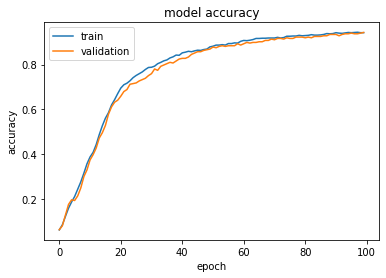

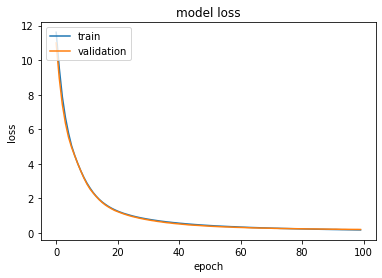

In [22]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Analyze the results.

1.   Print a summary of the model - use the model's class function **summary()**. How many parameters does the model have? Is a big or a small model?
2.   What was the accuracy we obtained at the end of the training? Do you use the training or validation accuracy to answer?
3. If you run the model several times, do you always obtain the same accuracy? 

1, The model have 650 parameters but we only have one layer made of 10 neurons, so it is a small model.

2, At the end of the training we have an accuracy of 0.9383 on the training data and an accuracy of 0.9436 which represents the accuracy of the model.

3, No, the results will always be different, for example, when I run it again I have an accuracy of 0.9258  instead of 0.9436.


In [23]:
print (model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                650       
Total params: 650
Trainable params: 650
Non-trainable params: 0
_________________________________________________________________
None


## print the confusion matrix obtained on the test dataset.

Use the **confusion_matrix()** function provided in **sklearn.metrics**.

In [24]:
 Y_test_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
CM = confusion_matrix (np.argmax(y_test,axis=1), np.argmax(Y_test_pred,axis=1))
print (CM)

[[36  0  1  0  0  0  0  0  0  0]
 [ 0 47  3  0  0  0  0  0  1  0]
 [ 0  0 43  2  0  0  0  0  1  0]
 [ 0  1  0 39  0  0  0  2  1  0]
 [ 0  1  0  0 45  0  0  0  0  2]
 [ 0  2  0  2  1 40  0  0  0  1]
 [ 0  0  0  0  0  0 38  0  1  0]
 [ 0  4  0  0  3  0  0 45  0  0]
 [ 0  2  1  0  0  0  0  0 37  1]
 [ 0  1  0  1  0  3  0  0  4 38]]


Normalize the confusion matrix to show graphically the prediction probability map.

Hint: The confusion matrix needs to be normalized by the counts of each class. Print the counts of elements in each class in the test dataset. Use the numpy function **unique()** to count the elements in y_test.

[37 51 46 43 48 46 39 52 41 47]


Text(0.5, 0, 'predicted label')

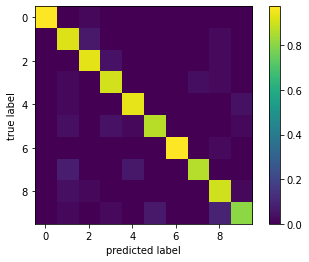

In [25]:
_,count = np.unique(np.argmax(y_test,axis=1),return_counts=True)
print (count)
CM = CM/count
CM = np.round(1000*CM)/1000
plt.figure('confusion matrix')
ax = plt.imshow(CM); plt.colorbar()
plt.ylabel('true label')
plt.xlabel('predicted label')


Evaluate the model on the test dataset. What is the accuracy on the test dataset? Use the model's class function **evaluate()**.

We have an accuracy of 0.908 on the dataset and a loss of 0.313.

In [26]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print ("The loss and accuracy on the test dataset : %f, %f"%(test_loss,test_accuracy))

15/15 [==============================] - 0s 2ms/step - loss: 0.3250 - accuracy: 0.9067
The loss and accuracy on the test dataset : 0.324952, 0.906667


## **Conclusions:**
Conclude your report by answering the following questions:

1. Did your training converge? 
2. Was the training successful? 
3. Do you always obtain the same accuracy when you run the code several times? 
4. Do all classes always predict with the same accuracy? 
5. Are there classes where the prediction happens to fail?

1, Yes the training converged toward a good accuracy, by plotting the model loss, we can also say that we have no overfitting

2, We can say that the training was successful, the test score are pretty good, we have an accuracy of 0.906667 and a model loss of 0.3250.

3, No we don't get the same accuracy when we run the code again, this is most likely due to the fact that our algorithm use randomness during learning, ensuring a different model is trained each run. We could resolve this issue by setting a random_state.

4, No, some classes have a almost perfect score like for the number 0, but others have a lot have misclassification like the numbers 5,7,9. We can see this with the conufsion matrix.

5, The classification never entirely fails, but some works less than others, the worst class here is the 9th, with 9 missclassification.